## Modellek Összegzése

### Szükséges csomagok

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import tensorflow_hub as hub

### Adathalmaz Betöltése

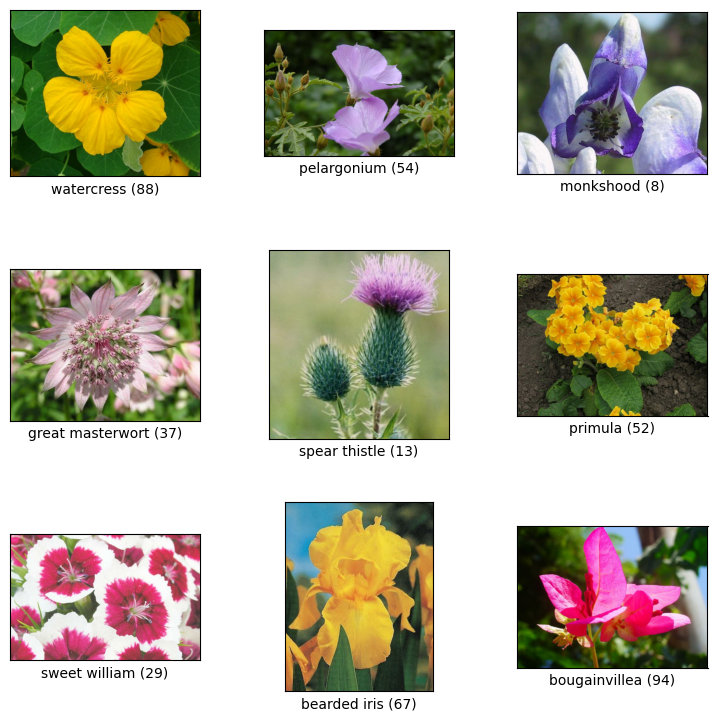

In [20]:
(train,test,valid),info = tfds.load(
        'oxford_flowers102',
        as_supervised=True,
        split=['train','test','validation'],
        with_info=True,
        data_dir='./datasets',
        shuffle_files=True
    )

fig = tfds.show_examples(valid,info)

### Címkék Feldolgozása

In [26]:
labels = [ item.strip() for item in open('./datasets/oxford_flowers102/2.1.1/label.labels.txt','r').readlines() ]
num_of_labels = len(labels)

num_training_examples = train.cardinality().numpy()
num_validation_examples = valid.cardinality().numpy()
num_test_examples = test.cardinality().numpy()

1020

#### Adathalmaz Feldolgozása
- Képeket átformázzuk
- TensorFlow beépített függvényeit használjuk

In [27]:
def augment(image, label):
  new_width = new_height = 224
  image = tf.image.resize(image, (new_width, new_height))/255.0
  return image, label

In [28]:
model = tf.keras.models.load_model(
  "models\BOARDED_oxfordflower_BiT_1683555554",
  custom_objects={'KerasLayer': hub.KerasLayer})

1/1 [==============================] - 7s 7s/step


<Figure size 1000x900 with 0 Axes>

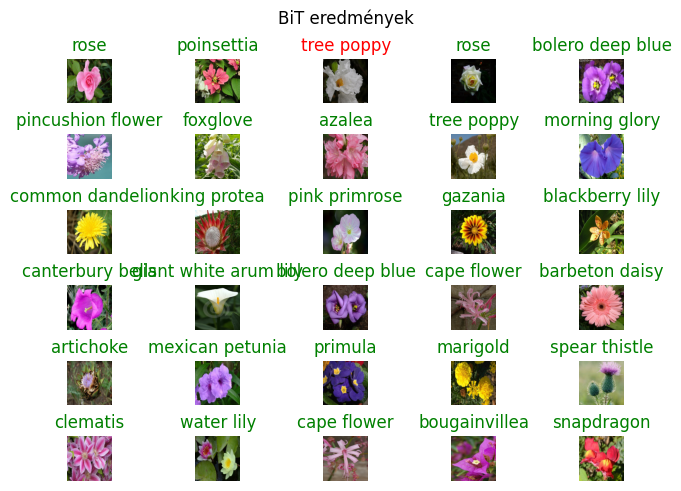

In [29]:
test = valid.cache().shuffle(num_training_examples//4).map(augment).batch(30).prefetch(1)
img, label = next(iter(test.take(1)))
tmp = model.predict(img.numpy())
res = tf.argmax(tmp, axis=1)

plt.figure(figsize=(10,9))
plt.subplots(6,5, constrained_layout=True)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(img[n])
    color = "green" if res[n] == label[n] else "red"
    plt.title(labels[label[n]], color=color)
    plt.axis('off')
    _ = plt.suptitle("BiT eredmények")